In [1]:
load('../VeeringGeneralFunctions.sage')

In [2]:
sig = 'ivvPQQcfghghfhgfaddddaaaa_20000222'

In this example, we want to find which classes have $1$-prongs.

In [25]:
cone = get_fibered_cone(sig)
cone.Hilbert_basis()

N(-1, 3),
N( 1, 1),
N( 0, 1)
in 2-d lattice N

In [4]:
min_dir = get_minimal_direction(sig)
min_dir

[(0, 1.566799236972411)]

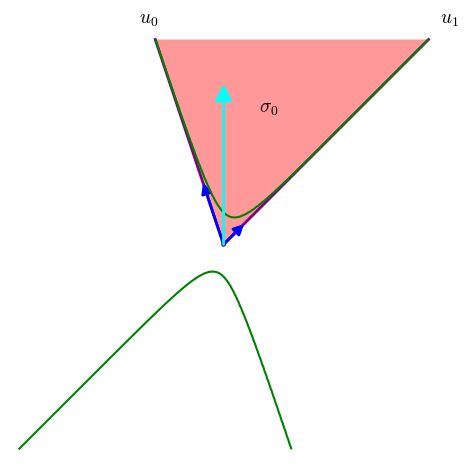

In [12]:
get_fibered_cone_and_levset_plot(sig) + arrow((0, 0), (min_dir[0][0]*5, min_dir[0][1]*5), color='cyan')

In [13]:
get_Thurston_norm(sig)

2*a0 + 2*a1

In [14]:
maps = get_LES_boundary_matrices(sig)
maps

[
[3 0]  [-4 -3]
[0 1], [ 1  0]
]

In [15]:
v = vector([var('a'), var('b')])
maps[0]*v, maps[1]*v

((3*a, b), (-4*a - 3*b, a))

In [16]:
point = v
substitution_dict = {get_hom_vars(sig)[i]:point[i] for i in range(len(point))} # substitute the given point for our variable place holders.
two_chain_with_free_vars = get_2_chain_from_point_in_homology(sig).subs(substitution_dict)
two_chain_with_free_vars

(r138, 2*a + b - r140 - r141 - r142, -2*a - r138 + r139 + r143, r142, r141, 2*a + r137 + r138 - r142, -2*a - r138 + r139 + r142, a + b + r138 - r139 - r141 - r142 - r143, 2*a + b - r137 - r139 - r143, r143, 2*a + b + r138 - r139 - r140 - r141 - r142, -a - r137 - r138 + r140 + r141 + r142, r140, r139, -r138 + r141 + r142, r137)

In [18]:
no_free_vars = [] # two_chain_with_vars still contains the free variables. We want to set those all to 0. But NOT g!
for term in two_chain_with_free_vars:
    no_free_vars.append(term.subs({v:0 for v in term.variables() if v not in [var('a'), var('b')]})) # don't replace the variable g with 0 here!

no_free_vars = vector(no_free_vars)
no_free_vars

(0, 2*a + b, -2*a, 0, 0, 2*a, -2*a, a + b, 2*a + b, 0, 2*a + b, -a, 0, 0, 0, 0)

In [19]:
total_prongs_each_boundary_comp = get_prongs_matrix(sig)*no_free_vars
total_prongs_each_boundary_comp

(b, 4*a + 3*b)

NOTE: BOUNDARY COMPONENT LABELS ARE FLIPPED IN THIS EXAMPLE AS COMPARED TO THE THESIS!

Thus if a class has one prongs then:
$$ \frac{b}{\gcd(3a,b)} = 1 \iff \gcd(3a,b) = b \iff b \mid 3a \iff b \mid 3 \iff b \in \{1,3\} $$
or
$$ \frac{4a + 3b}{\gcd(-4a-3b, a)} = \frac{4a+3b}{\gcd(3,a)} = 1 \iff \gcd(3,a) = 4a+3b \implies 4a+3b \in \{1,3\}$$

## Thesis section 3.1 example

In this example, we are considering the classes $(1,6i)$ for $i$ ranging from $1$ to infinity.
Clearly these classes are in the fibered cone since we can write these classes as positive linear combinations of two of the Hilbert basis vectors:
$$ (1,6i) = 1\cdot(1,1) + (6i-1)\cdot(0,1) $$

Moreover, given that the Thurston norm has formula
$$ \| (a,b) \| = 2a + 2b $$
we see
$$ \| (1,6i) \| = 2 + 12i. $$

To count punctures, we use the boundary maps:

In [21]:
v = vector([1, 6*var('i')])
maps[0]*v, maps[1]*v

((3, 6*i), (-18*i - 4, 1))

whereby $\sigma_1(1,6i) = \gcd(3,6i) = 3$ and $\sigma_2(1,6i) = \gcd(-18i - 4,1) = 1$.
Hence $\sigma(1,6i) = 3 + 1 = 4$ and so
$$g(1,6i) = \frac{1}{2}(\|(a,6i)\| - \sigma(1,6i) + 2) = \frac{1}{2}(2 + 12i - 4 + 2) = 6i.$$

So far this verifies everything done in the thesis.
It remains to see that these classes have no $1$-prongs.

In [22]:
point = v
substitution_dict = {get_hom_vars(sig)[i]:point[i] for i in range(len(point))} # substitute the given point for our variable place holders.
two_chain_with_free_vars = get_2_chain_from_point_in_homology(sig).subs(substitution_dict)
two_chain_with_free_vars

(r145, 6*i - r147 - r148 - r149 + 2, -r145 + r146 + r150 - 2, r149, r148, r144 + r145 - r149 + 2, -r145 + r146 + r149 - 2, 6*i + r145 - r146 - r148 - r149 - r150 + 1, 6*i - r144 - r146 - r150 + 2, r150, 6*i + r145 - r146 - r147 - r148 - r149 + 2, -r144 - r145 + r147 + r148 + r149 - 1, r147, r146, -r145 + r148 + r149, r144)

In [23]:
no_free_vars = [] # two_chain_with_vars still contains the free variables. We want to set those all to 0. But NOT g!
for term in two_chain_with_free_vars:
    no_free_vars.append(term.subs({v:0 for v in term.variables() if v != var('i')})) # don't replace the variable g with 0 here!

no_free_vars = vector(no_free_vars)
no_free_vars

(0, 6*i + 2, -2, 0, 0, 2, -2, 6*i + 1, 6*i + 2, 0, 6*i + 2, -1, 0, 0, 0, 0)

In [24]:
total_prongs_each_boundary_comp = get_prongs_matrix(sig)*no_free_vars
total_prongs_each_boundary_comp

(6*i, 18*i + 4)

This implies that three singularities in the orbit corresponding to the first boundary component has $\frac{6i}{3} = 2i \neq 1$ prongs each and the sole singularity in the orbit corresponding to the second boundary component has $18i+4 \neq 1$ prongs.